In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd gdrive

Epoch 1/300
21/21 [==============================] - 0s 1ms/step - loss: 795526.3125
Epoch 2/300
21/21 [==============================] - 0s 931us/step - loss: 795247.5000
Epoch 3/300
21/21 [==============================] - 0s 998us/step - loss: 794951.6875
Epoch 4/300
21/21 [==============================] - 0s 1ms/step - loss: 794624.6875
Epoch 5/300
21/21 [==============================] - 0s 981us/step - loss: 794258.0000
Epoch 6/300
21/21 [==============================] - 0s 1ms/step - loss: 793848.8125
Epoch 7/300
21/21 [==============================] - 0s 1ms/step - loss: 793390.1250
Epoch 8/300
21/21 [==============================] - 0s 985us/step - loss: 792883.9375
Epoch 9/300
21/21 [==============================] - 0s 1ms/step - loss: 792319.5000
Epoch 10/300
21/21 [==============================] - 0s 1ms/step - loss: 791694.8750
Epoch 11/300
21/21 [==============================] - 0s 988us/step - loss: 791004.3750
Epoch 12/300
21/21 [==============================] -

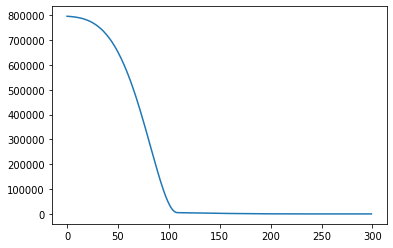

In [68]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
import seaborn as sbn

datas = pd.read_excel('/gdrive/My Drive/KerasDeepLearning/BicyclesPrices.xlsx')

x = datas.iloc[:,1:].values
y = datas.iloc[:,:1].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33,random_state=15)

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

model.fit(x_train_scaled, y_train, epochs=300)

loss = model.history.history['loss']

sbn.lineplot(x=range(len(loss)), y=loss)
 

In [69]:
print("Train loss = ",model.evaluate(x_train_scaled, y_train, verbose=0))
print("Test loss = ",model.evaluate(x_test_scaled, y_test, verbose=0))


testPredicts = model.predict(x_test_scaled)

DF_pred = pd.DataFrame(y_test, columns=['Real Price'])
testPredicts = pd.Series(testPredicts.reshape(330,))

DF_pred = pd.concat([DF_pred,testPredicts],axis=1)

DF_pred.columns= ['Price Real', 'Price Predict']

Train loss =  73.28866577148438
Test loss =  4583.28466796875


In [70]:
DF_pred

,Price Real,Price Predict
0,1081.652164,1155.668823
1,622.675990,686.989807
2,889.356810,949.327026
3,902.826733,952.613525
4,897.662404,955.508789
...,...,...
325,1028.438035,1091.939331
326,789.934950,848.615295
327,758.490486,836.979126
328,1172.871659,1252.899536


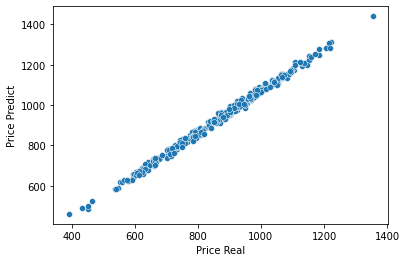

In [71]:
sbn.scatterplot( x='Price Real', y = 'Price Predict' , data = DF_pred)

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean Absolute Error: ",mean_absolute_error(DF_pred['Price Real'], DF_pred['Price Predict']))
print("Mean Squared Error: ",mean_squared_error(DF_pred['Price Real'], DF_pred['Price Predict']))


Mean Absolute Error:  66.25379951937617
Mean Squared Error:  4583.284302971658


In [73]:
## Save model
model.save('Bicycle_Model.h5')

BicycleModel = load_model('Bicycle_Model.h5')

In [74]:
values = [[1751,1750]]
values_scaled = scaler.transform(values)
BicycleModel.predict(values_scaled)

array([[989.2004]], dtype=float32)